In [1]:
# Import Transformer Lens, and load pythia models
from transformer_lens import HookedTransformer
import torch as th
from datasets import load_dataset
# from transformers import AutoTokenizer
from torch.utils.data import DataLoader
from tqdm import tqdm
from einops import rearrange
device = th.device("cuda" if th.cuda.is_available() else "cpu")
MODEL_NAME_LIST = [
   "solu-1l",
   "solu-2l",
   "solu-3l",
   "solu-4l",
   "solu-6l",
   "solu-8l",
   "solu-10l",
   "solu-12l",
   "gelu-1l",
   "gelu-2l",
   "gelu-3l",
    "gelu-4l",
    
]
  # Load the training set from pile-10k

all_stds = []
for MODEL_NAME in MODEL_NAME_LIST:
    try: 
        del model, d, neuron_activations
        th.cuda.empty_cache()
    except:
        pass
    # model = HookedTransformer.from_pretrained("EleutherAI/pythia-70m-deduped", device=device)
    # model = HookedTransformer.from_pretrained("EleutherAI/pythia-160m-deduped", device=device)
    model = HookedTransformer.from_pretrained(MODEL_NAME, device=device)
    # model = HookedTransformer.from_pretrained("EleutherAI/pythia-1b-deduped", device=device)

    # tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-160m-deduped")
    seq_length = 5

    d = load_dataset("NeelNanda/pile-10k", split="train[:100]").map(
        lambda x: model.tokenizer(x['text']),
        batched=True,
    ).filter(
        lambda x: len(x['input_ids']) > seq_length
    ).map(
        lambda x: {'input_ids': x['input_ids'][:seq_length]}
    )
    neurons = model.cfg.d_mlp
    dataset_size = d.num_rows
    batch_size = 64
    layers = len(model.blocks)


    final_std = th.zeros((layers, seq_length))
    for layer in range(layers):
        neuron_activations = th.zeros((dataset_size*seq_length, neurons))
        with th.no_grad(), d.formatted_as("pt"):
            dl = DataLoader(d["input_ids"], batch_size=batch_size)
            for i, batch in enumerate(tqdm(dl)):
                _, cache = model.run_with_cache(batch.to(device))
                # neuron_activations[i*batch_size*seq_length:(i+1)*batch_size*seq_length,:] = rearrange(cache[f"blocks.{layer}.mlp.hook_pre"], "b s n -> (b s) n" )
                neuron_activations[i*batch_size*seq_length:(i+1)*batch_size*seq_length,:] = rearrange(cache[f"blocks.{layer}.mlp.hook_post"], "b s n -> (b s) n" ).cpu()
        
            for pos in range(seq_length):
                std = 0
                for neuron in range(neurons):
                    # mean = neuron_activations.flatten()[neuron::N,neuron*neuron_range:(neuron+1)*neuron_range].mean()
                    std += neuron_activations[pos::seq_length,neuron].std()
                # print(f"Layer, Position {layer},{pos}: {std/neurons}")
                final_std[layer, pos] = std/neurons
    all_stds.append(final_std.detach().clone())

/home/mchorse/miniconda3/envs/logan/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded pretrained model solu-1l into HookedTransformer


Found cached dataset parquet (/home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-b8e1481dc53943ec.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-dd592927999a52a0.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-a3df6e45a71ef46b.arrow
100%|██████████| 2/2 [00:00<00:00, 143.65it/s]


Loaded pretrained model solu-2l into HookedTransformer


Found cached dataset parquet (/home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-45bec8e2659c7305.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-1c48f9ebc1312353.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-1270f2d8f598ff8c.arrow
100%|██████████| 2/2 [00:00<00:00, 109.23it/s]


Loaded pretrained model solu-3l into HookedTransformer


Found cached dataset parquet (/home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-cd59928d0714c574.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-4a7585afb192b229.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-1d04330fa13ca0d0.arrow
100%|██████████| 2/2 [00:00<00:00, 88.41it/s]


Loaded pretrained model solu-4l into HookedTransformer


Found cached dataset parquet (/home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-d236f21dbcf61643.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-1afd09e569b4348b.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-a0008682aef46d98.arrow
100%|██████████| 2/2 [00:00<00:00, 64.02it/s]


Loaded pretrained model solu-6l into HookedTransformer


Found cached dataset parquet (/home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-4a06b0c019662250.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-d1eb3f6e13281d52.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-74267425fc5170d7.arrow
100%|██████████| 2/2 [00:00<00:00, 49.03it/s]


Loaded pretrained model solu-8l into HookedTransformer


Found cached dataset parquet (/home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-4efe1f248991e2b4.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-7e966d1ce61d18ae.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-5cc29ac5b553d6ff.arrow
100%|██████████| 2/2 [00:00<00:00, 37.69it/s]


Loaded pretrained model solu-10l into HookedTransformer


Found cached dataset parquet (/home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-60b08b2dca3b566a.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-8761c722d28c4383.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-fe6cfc0aac45bb82.arrow
100%|██████████| 2/2 [00:00<00:00, 28.12it/s]


Loaded pretrained model solu-12l into HookedTransformer


Found cached dataset parquet (/home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-78da4668252f45ff.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-01b475c24871ef69.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-38a6dce252f01895.arrow
100%|██████████| 2/2 [00:00<00:00, 25.37it/s]


Loaded pretrained model gelu-1l into HookedTransformer


Found cached dataset parquet (/home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-07de2caeb178393e.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-d4cfbe1fce31d38f.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-64b62429eb74fb49.arrow
100%|██████████| 2/2 [00:00<00:00, 170.58it/s]


Loaded pretrained model gelu-2l into HookedTransformer


Found cached dataset parquet (/home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-35a4429db2ed009b.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-7ab19aaf290cd135.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-0c82a07cc778db0c.arrow
100%|██████████| 2/2 [00:00<00:00, 117.59it/s]


Loaded pretrained model gelu-3l into HookedTransformer


Found cached dataset parquet (/home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-48b2698efc73fbb4.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-ccc49e770c2ae3ad.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-4a076e82c8f0575b.arrow
100%|██████████| 2/2 [00:00<00:00, 93.83it/s]


Loaded pretrained model gelu-4l into HookedTransformer


Found cached dataset parquet (/home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-d44c5f1d6ea0f11c.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-bfbf39da33e4ca4e.arrow
Loading cached processed dataset at /home/mchorse/.cache/huggingface/datasets/NeelNanda___parquet/NeelNanda--pile-10k-72f566e9f7c464ab/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-6fba546361768cc1.arrow
100%|██████████| 2/2 [00:00<00:00, 75.95it/s]


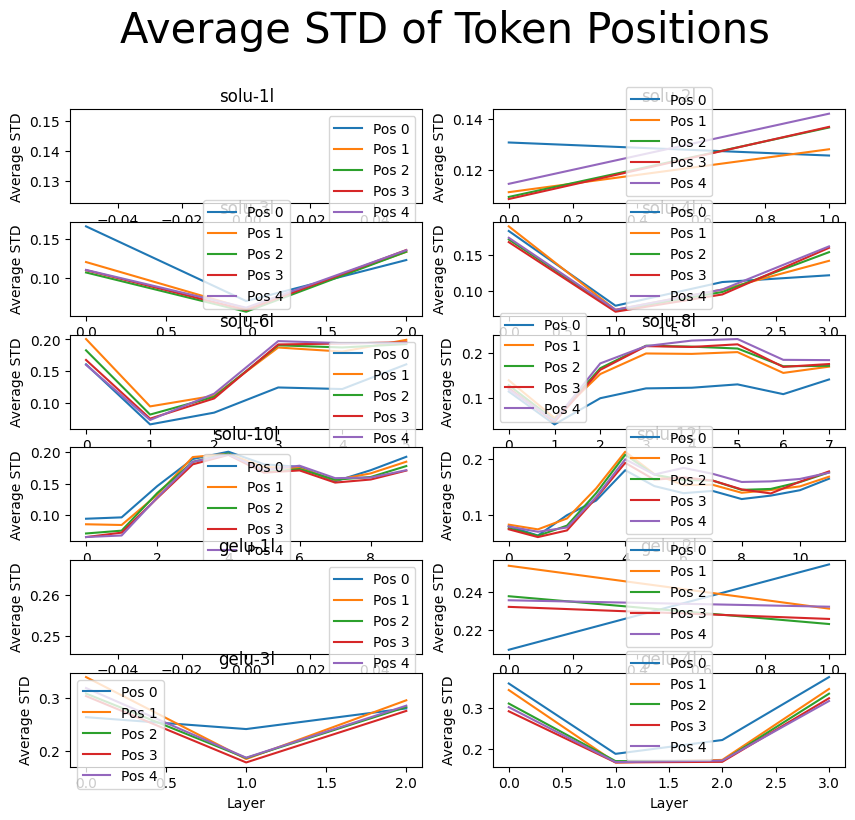

In [2]:
from matplotlib import pyplot as plt
labels = [f"Pos {x}" for x in range(5)]
f = plt.figure(figsize=(10,10))
# plt.title (f"STD of Token Position: Pythia-{MODEL_NAME_LIST[i]}")
f.suptitle('Average STD of Token Positions', fontsize=30)
model_len = len(MODEL_NAME_LIST)
for i in range(model_len):
  f.add_subplot(model_len//2+1,2,i+1)
  plt.plot(all_stds[i])
  plt.legend(labels)
  plt.xlabel("Layer")
  plt.ylabel("Average STD")
  plt.title (f"{MODEL_NAME_LIST[i]}")

In [5]:
print(all_stds[0])
print(all_stds[8])

tensor([[0.1524, 0.1296, 0.1266, 0.1238, 0.1269]])
tensor([[0.2673, 0.2564, 0.2501, 0.2468, 0.2485]])


In [4]:
final_std

tensor([[0.3601, 0.3442, 0.3114, 0.2925, 0.3025],
        [0.1889, 0.1680, 0.1713, 0.1681, 0.1688],
        [0.2226, 0.1742, 0.1712, 0.1696, 0.1725],
        [0.3757, 0.3468, 0.3353, 0.3243, 0.3175]])